In [97]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense


In [98]:
(previsores_treino, classe_treino),(previsores_teste, classe_teste) = mnist.load_data()

In [99]:
previsores_treino = previsores_treino.astype('float32') / 255
previsores_teste - previsores_teste.astype('float32') / 255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [100]:
# Redimensionar os dados para um vetor de 784 elementos (28x28 imagens)
previsores_treino = previsores_treino.reshape((len(previsores_treino), np.prod(previsores_treino.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))


In [101]:
#autoencoder
#784 - 32 - 784

784/32

24.5

In [102]:
autoencoder = Sequential([
    Dense(units=32, activation='relu', input_dim=784),
    Dense(units=784, activation='sigmoid')
])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_crossentropy'])
autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                25120     
                                                                 
 dense_23 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
autoencoder.fit(previsores_treino, previsores_treino, epochs=75, batch_size=256, validation_data=(previsores_teste, previsores_teste))


Epoch 1/75
235/235 [==============================] - 5s 17ms/step - loss: 0.2777 - binary_crossentropy: 0.2777 - val_loss: -2770.0747 - val_binary_crossentropy: -2770.0747
Epoch 2/75
235/235 [==============================] - 2s 11ms/step - loss: 0.1689 - binary_crossentropy: 0.1689 - val_loss: -9108.4980 - val_binary_crossentropy: -9108.4980
Epoch 3/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1424 - binary_crossentropy: 0.1424 - val_loss: -13038.5459 - val_binary_crossentropy: -13038.5459
Epoch 4/75
235/235 [==============================] - 3s 11ms/step - loss: 0.1272 - binary_crossentropy: 0.1272 - val_loss: -17399.6953 - val_binary_crossentropy: -17399.6953
Epoch 5/75
235/235 [==============================] - 2s 10ms/step - loss: 0.1175 - binary_crossentropy: 0.1175 - val_loss: -21573.7656 - val_binary_crossentropy: -21573.7656
Epoch 6/75
235/235 [==============================] - 4s 16ms/step - loss: 0.1108 - binary_crossentropy: 0.1108 - val_loss: -2649

In [104]:
dimensao_original = Input(shape=(784,))
camada_encoder = autoencoder.layers[0]
encoder = Model(dimensao_original, camada_encoder(dimensao_original))
encoder.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_22 (Dense)            (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
imagem_cod = encoder.predict(previsores_teste)
imagem_decod = autoencoder.predict(previsores_teste)


313/313 [==============================] - 1s 2ms/step


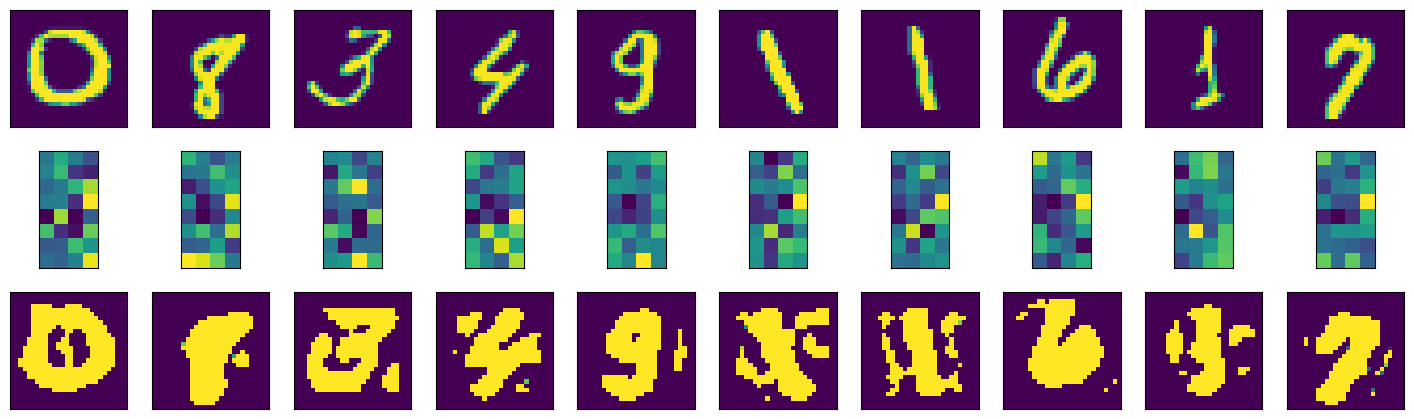

In [106]:
num_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size=num_imagens)

plt.figure(figsize=(18, 18))
for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28, 28))
    plt.xticks([])
    plt.yticks([])

    # Imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + num_imagens)
    plt.imshow(imagem_cod[indice_imagem].reshape(8, 4))
    plt.xticks([])
    plt.yticks([])

    # Imagem decodificada
    eixo = plt.subplot(10, 10, i + 1 + num_imagens * 2)
    plt.imshow(imagem_decod[indice_imagem].reshape(28, 28))
    plt.xticks([])
    plt.yticks([])

plt.show()
